# Leveraging Pipeline and Plotting results in Supervised Learning

**Arthur Carbonare de Avila**  
*For RocPy meeting June 2020*


# The basic idea of Supervised Learning

* There is a variable you want to predict: $y$
* You have possible predictive variables $X = (X_1, X_2, \dots, X_p)$ you can use associate with values of $y$
* Assume there is a function $f$ that relates $X$ to $y$:

$$
y = f(X) + \varepsilon
$$

* Error: $\varepsilon$ with expected value (average) 0.
* You can estimate $f$ for prediction and inference.

## Inference

Inference looks for answers to questions like:  
* Which predictors are associated with the response variable?  
* What is the relation of each predictor to the response?  

More concrete examples:  
* How much will cholesterol levels decrease if you increase the drug dosage by 100mg?
* Does advertising on TV increase sales to Gen Z customers?

## Prediction

* Input variables $X$ are easy to obtain, but output $y$ is not.  
* Estimate $\hat f$ that can predict $y$ using:  

$$
\hat y = \hat f(X)
$$

* $\hat f$ is a *black box*: we don't care about it as long as it predicts $y$ accurately.

$$
E(y-\hat y)^2 = E\left[f(X)+\varepsilon-\hat f(X)\right]^2 =  \underbrace{\left[f(X)-\hat f(X)\right]^2}_{\text{Reducible}} + \underbrace{\text{Var}(\varepsilon)}_\text{Irreducible}
$$

* Bias-Variance Trade-off:

$$
E\left(y_0-\hat f(x_0)\right)^2 = \text{Var}(\hat f(x_0)) + [\text{Bias}(\hat f(x_0))]^2 + \text{Var}(\varepsilon)
$$

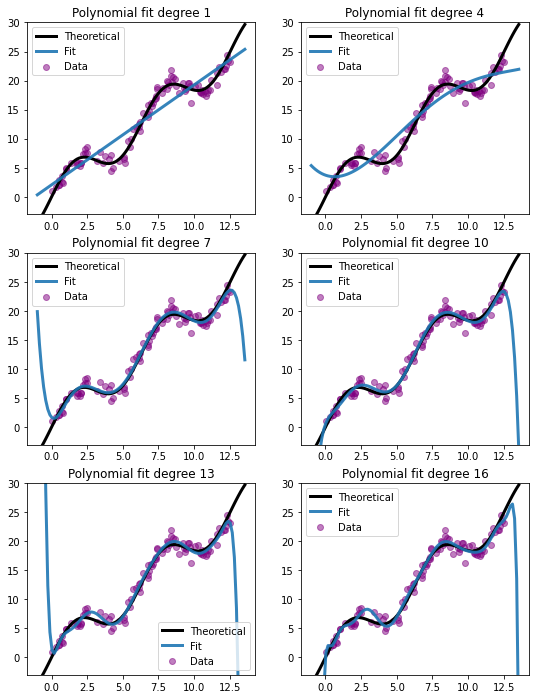

In [1]:
# Simulate data
# y = 2 X + 3 Sin(X) + e
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(421)
error = np.random.normal(0,1,100)
X = np.random.uniform(0, 4*np.pi, 100)
y = 2*X + 3*np.sin(X) + error
support = np.linspace(0-1, 4*np.pi+1, 100)
theoretical = 2*support + 3*np.sin(support)

# Fit y_hat = a_0 + a_1 x + a_2 x^2 + ... a_k x^k + e
# and plot
fig, axss = plt.subplots(3,2, figsize=(9,12))
axs = axss.ravel()

for i, ax in enumerate(axs):
    ax.scatter(X, y, color='purple', label='Data', alpha = 0.5)
    ax.plot(support, theoretical, "-k", label='Theoretical', linewidth=3)
    degree = 3*i+1
    coef = np.polyfit(X, y, degree)
    p = np.poly1d(coef)
    ax.plot(support, p(support), label='Fit', alpha=0.9, linewidth=3)
    ax.legend()
    ax.set_ylim(-3, 30)
    ax.set_title('Polynomial fit degree %d' % degree)
plt.show()

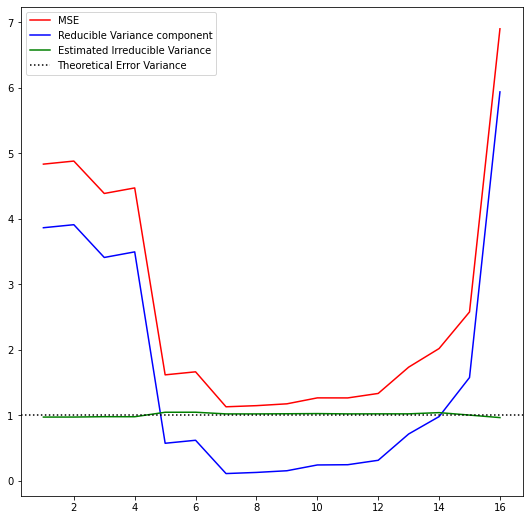

In [2]:
levels = 17
reps = 100
MSE = np.zeros((reps, levels-1))
Bias = np.zeros((reps, levels-1))
np.random.seed(421)
for rep in range(reps):
    # Create data to fit model
    error = np.random.normal(0,1,100)
    X = np.random.uniform(0, 4*np.pi, 100)
    y = 2*X + 3*np.sin(X) + error
    # Create validation data: out of sample prediction
    error_test = np.random.normal(0,1,100)
    X_test = np.random.uniform(0, 4*np.pi, 100)
    y_test = 2*X_test + 3*np.sin(X_test) + error_test
    theoretical_fit = y_test - error_test
    for i in range(1, levels):
        p = np.poly1d(np.polyfit(X, y, i))
        pred = p(X_test)
        Bias[rep,i-1] = np.mean((theoretical_fit-pred)**2)
        MSE[rep,i-1] = np.mean((y_test-pred)**2)

Variance = MSE - Bias

plt.figure(figsize=(9,9))
plt.plot(range(1,levels), np.mean(MSE, axis=0), '-r', label='MSE')
plt.plot(range(1,levels), np.mean(Bias, axis=0), '-b', label='Reducible Variance component')
plt.plot(range(1,levels), np.mean(Variance, axis=0), '-g', label='Estimated Irreducible Variance')
plt.axhline(1, ls=':', c='k', label='Theoretical Error Variance')
plt.legend()
plt.show()

Concrete examples:
#### Regression problem (Continuous target)
* Given characteristics of a house, what is the market value for it?
   - Easy to obtain: area, number of bedrooms, number of bathrooms, covered garage for how many cars, garage attached or not, lot size, zip code, school district, AC/Heating characteristics, ...
   - Actual sale price hard to collect: a very small portion of houses are sold at any given moment.  

#### Classification problem (Categorical target)
* Given the header and body of an email, is it ham or spam?
* Given a bird picture, what species of bird is it?

## Usual data analysis process for prediction:

1) Exploratory Data Analysis  
2) Extract features, Clean data, more EDA  
3) Split data Train/Test  
4) Fit alternative models  
5) Predict using test data (Cross Validation)  
6) Select model with best predictive ability  
7) Predict the desired data  

**EDA is the most impotant step.**  
Coding for EDA deserves a presentation itself.

# SciKit-Learn for supervised learning in Python

### Pros:
* Optimized for predicton estimation
* Easy to code for cross validation
* Standardized code for a huge variety of statistical models
* Very good documentation

### Cons:
* Very easy to compute something you don't know nothing about
* Does not compute ANY values for statistical inference
* Trash in = Trash out

### API Reference

https://scikit-learn.org/stable/modules/classes.html

## Pre-processing Data

Steps:

1) Import or generate data  
2) EDA  
3) Clean data, extract features, impute missing values...  
4) Split features and target  
    - usually into a numpy array or a pandas data frame  
5) Split train and test  

### Some useful modules:

**[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)** for generating data or importing sample datasets


**[sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)** for missing values


**[sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)** for normalization, polynomials, encoding categorical variables...


**[sklearn.feature_extraction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction)** for text and image data


**[sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)** for train_test_split function

**Will get back to this when looking at Pipeline**


In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=400, n_features=20, effective_rank=15, noise=3, random_state=32)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=100)

## Fitting a model

Steps:  
1) Import model  
2) Initialize model  
3) Call fit method using train data  

### Some useful modules

**[sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)** Ordinary least squares and other related models for regression and classification (Ridge, Lasso, Logit...)

**[sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)** Support Vector Machines

**[sklearn.naive_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)** Naive Bayes models

**[sklearn.neural_network](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)** Neural Network models (No GPU access: you may want to use Keras instead)

**[sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)** Random Forest, Boosting, and Voting models

In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train) #Pretty underwhelming...

DecisionTreeRegressor()

## Evaluating how good the fit is

#### Regression default metric:
$$
R^2 = 1 - \frac{\sum_{i=1}^N\left(y_i - \hat y_i\right)^2}{\sum_{i=1}^N\left(y_i - \bar y\right)^2} = 1-\frac{RSS}{TSS} \leq 1
$$

#### Classification default metric:
$$
Accuracy = \frac{\text{# Correct predictions}}{\text{# Predictions}} \in [0,1]
$$

### For other metrics:
**[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)**

In [5]:
R2 = reg.score(X_train, y_train) 
print('Coefficient of determination %.3f' % R2)
print('Perfect Fit!')

Coefficient of determination 1.000
Perfect Fit!


## Predicting a model

Use predict method with features data to predict

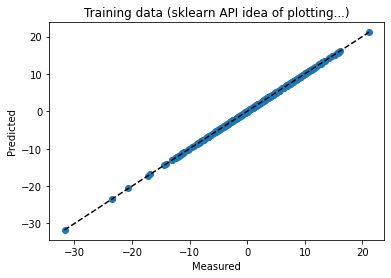

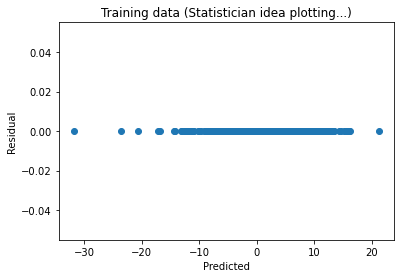

In [6]:
# prediction
predicted = reg.predict(X_train)

# plotting predictions
plt.scatter(y_train, predicted)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Training data (sklearn API idea of plotting...)')
plt.show()
plt.close()

plt.scatter(predicted, y_train-predicted)
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.title('Training data (Statistician idea plotting...)')
plt.show()
plt.close()


## Testing predictions with Cross Validation

### Validation set approach

Now that we found a "Perfect" model, let's make some really money making predictions using the Test data!


Coefficient of determination on train data: 1.000
Coefficient of determination on test data: -0.109
Oops... Didn't I have a perfect model?
Negative R^2 means predictions are worse than predicting a constant equal to the mean.


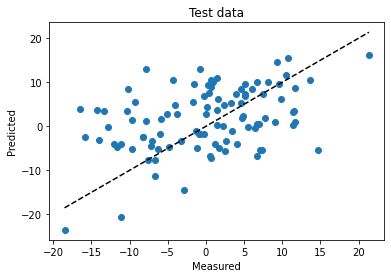

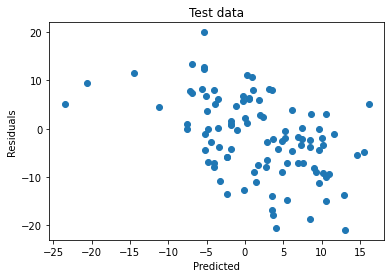

In [7]:
print('Coefficient of determination on train data: %.3f' % R2)
print('Coefficient of determination on test data: %.3f' % reg.score(X_test, y_test))
print("Oops... Didn't I have a perfect model?")
print("Negative R^2 means predictions are worse than predicting a constant equal to the mean.")

predicted = reg.predict(X_test)

plt.scatter(y_test, predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Test data')
plt.show()
plt.close()

plt.scatter(predicted, y_test - predicted)
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.title('Test data')
plt.show()
plt.close()

### Understanding the result:
* Models are estimated trying to minimize some measure of error.  
* Overfitting: $\hat f$ fits the training data, not the the true $f$.
* Possible solution: evaluate the model for predictions made on Validation (Test) set.

Coefficient of determination on train data: 0.858
Not so Perfect Fit.
Coefficient of determination on test data: 0.820
However, much better predictions.


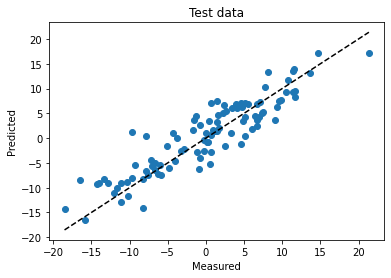

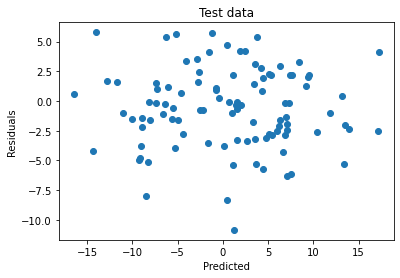

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
R2 = reg.score(X_train, y_train) 
print('Coefficient of determination on train data: %.3f' % R2)
print('Not so Perfect Fit.')
print('Coefficient of determination on test data: %.3f' % reg.score(X_test, y_test))
print('However, much better predictions.')

predicted = reg.predict(X_test)

plt.scatter(y_test, predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Test data')
plt.show()
plt.close()

plt.scatter(predicted, y_test - predicted)
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.title('Test data')
plt.show()
plt.close()

### Cross-Validation
The idea is to create several slices of the data to evaluate the performance of the regressor or classifier predicting on data not used for the estimation. Then average the performance accross slices.

* K-Fold: Divide data in $K$ parts, save each $1/K$-th of the data for testing predictions on the model estimated by the remaining of the data.
* Stratified K-Fold: For categorical response variables, ensure that the categories of the response variable is proportional to the whole data on each fold.
* Repeated (Stratified) K-Fold: repeats K-Fold a certain number of times (think bootstrap)

### Useful modules

**[sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)** for splitting methods

**[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)** for predefined metrics

### Tips
1) Set a random state on your cross validation splitters objects: it will guarantee you always get the same samples to reproduce results.  
2) Cross-Validation can take a long time to compute. Assign multiple processes by passing the parameter n_jobs for parallel computing: n_jobs = -1 will allocate all CPU cores, n_jobs = -2 will leave one core free. If dealing with large amounts of data, make sure you have enough memory to run all processes in parallel!

In [9]:
from sklearn.model_selection import KFold, RepeatedKFold

z = np.arange(9)
kf = KFold(n_splits=3)
print('Without random state\n')
print(kf, '\n')
for i, (train_index, test_index) in enumerate(kf.split(z)):
    print("Fold", i+1, "Train index:", train_index, "Test index:", test_index)

kf = KFold(n_splits=3, random_state=33, shuffle=True)
print('\n\nWith random state\n')
print(kf, '\n')
for i, (train_index, test_index) in enumerate(kf.split(z)):
    print("Fold", i+1, "Train index:", train_index, "Test index:", test_index)

kf = RepeatedKFold(n_splits=3,n_repeats=2, random_state=33)
print('\n\nRepeated\n')
print(kf, '\n')
for i, (train_index, test_index) in enumerate(kf.split(z)):
    print("Fold", i+1, "Train index:", train_index, "Test index:", test_index)


Without random state

KFold(n_splits=3, random_state=None, shuffle=False) 

Fold 1 Train index: [3 4 5 6 7 8] Test index: [0 1 2]
Fold 2 Train index: [0 1 2 6 7 8] Test index: [3 4 5]
Fold 3 Train index: [0 1 2 3 4 5] Test index: [6 7 8]


With random state

KFold(n_splits=3, random_state=33, shuffle=True) 

Fold 1 Train index: [0 1 2 4 5 7] Test index: [3 6 8]
Fold 2 Train index: [0 3 4 6 7 8] Test index: [1 2 5]
Fold 3 Train index: [1 2 3 5 6 8] Test index: [0 4 7]


Repeated

RepeatedKFold(n_repeats=2, n_splits=3, random_state=33) 

Fold 1 Train index: [0 1 2 4 5 7] Test index: [3 6 8]
Fold 2 Train index: [0 3 4 6 7 8] Test index: [1 2 5]
Fold 3 Train index: [1 2 3 5 6 8] Test index: [0 4 7]
Fold 4 Train index: [1 2 3 4 5 6] Test index: [0 7 8]
Fold 5 Train index: [0 3 5 6 7 8] Test index: [1 2 4]
Fold 6 Train index: [0 1 2 4 7 8] Test index: [3 5 6]


#### Using  Cross-Validation to compare models:

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressors = [DecisionTreeRegressor(),
              LinearRegression(),
              Lasso(),
              LassoCV(),
              KNeighborsRegressor(),
              RandomForestRegressor()]

for reg in regressors:
    print(reg)
    scores = cross_val_score(reg, X_train, y_train, cv=kf, n_jobs=-2)
    print('\nindividual scores:\n', scores)
    print('\nAverage score: %f \n\n' % np.mean(scores))


DecisionTreeRegressor()

individual scores:
 [-0.24002022 -0.15887245 -0.17525833 -0.18443705 -0.21164335  0.08259994]

Average score: -0.147939 


LinearRegression()

individual scores:
 [0.82034848 0.85596876 0.80241977 0.82328691 0.83007399 0.8636002 ]

Average score: 0.832616 


Lasso()

individual scores:
 [-7.84844296e-03 -6.11928088e-06 -7.34292019e-03 -9.48637050e-04
 -6.00764248e-02 -5.23200275e-02]

Average score: -0.021424 


LassoCV()

individual scores:
 [0.83178198 0.84774249 0.80758814 0.81852398 0.83450669 0.87050885]

Average score: 0.835109 


KNeighborsRegressor()

individual scores:
 [0.39002735 0.36062217 0.28615217 0.40417323 0.37990111 0.36951685]

Average score: 0.365065 


RandomForestRegressor()

individual scores:
 [0.47047236 0.47308583 0.46483553 0.51970326 0.49087908 0.60618159]

Average score: 0.504193 




## Improving predictions with Grid Search Cross Validation

Why does `Lasso` and `LassoCV` perform so different if they sound so similar?
From the API documentation on LassoCV:


> Lasso linear model with iterative fitting along a regularization path.  
> See glossary entry for cross-validation estimator.  
> The best model is selected by cross-validation.  
> The optimization objective for Lasso is:  
$$
\frac{1}{2 n_{samples}} ||y - X \beta||^2_2 + \alpha * ||\beta||_1
$$

In other words, `Lasso` is estimated used one value of $\alpha$, while `LassoCV` estimates the same for a multitude of values for $\alpha$ and then chooses the best value of $\alpha$ using Cross-Validation.

That is called Hyper Parameter Optimization.

### Useful Module:

**[sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)** for GridSearchCV and RandomSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_friedman1
X, y = make_friedman1(500, 10, random_state=30, noise=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

kf = RepeatedKFold(n_splits=3,n_repeats=2, random_state=11)
params = {'ccp_alpha':np.linspace(0,1,11)}
cvreg_small = GridSearchCV(DecisionTreeRegressor(random_state=123), params, cv=kf, n_jobs=-2, verbose=1)
cvreg_small.fit(X_train, y_train)
print(cvreg_small.best_params_)
print('Cross Validation Score: ', cvreg_small.best_score_)
print('Validation Set Score:   ', cvreg_small.score(X_test, y_test))

Fitting 6 folds for each of 11 candidates, totalling 66 fits
{'ccp_alpha': 0.4}
Cross Validation Score:  0.5211109097103713
Validation Set Score:    0.5232640407686532


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  66 out of  66 | elapsed:    0.2s finished


In [12]:
params = {'ccp_alpha':np.linspace(0,1,11),
          'max_features':list(range(1,11))}
cvreg_medium = GridSearchCV(DecisionTreeRegressor(random_state=123), params, cv=kf, n_jobs=-2, verbose=1)
cvreg_medium.fit(X_train, y_train)
print(cvreg_medium.best_params_)
print('Cross Validation Score: ', cvreg_medium.best_score_)
print('Validation Set Score:   ', cvreg_medium.score(X_test, y_test))

Fitting 6 folds for each of 110 candidates, totalling 660 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


{'ccp_alpha': 0.4, 'max_features': 9}
Cross Validation Score:  0.5435201980239266
Validation Set Score:    0.5039866919573361


[Parallel(n_jobs=-2)]: Done 524 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 660 out of 660 | elapsed:    1.2s finished


In [13]:
params = {'ccp_alpha':np.linspace(0,1,11),
          'max_features':list(range(1,11)),
          'min_samples_split':np.arange(2,10)}
cvreg_large = GridSearchCV(DecisionTreeRegressor(random_state=123), params, cv=kf, n_jobs=-2, verbose=1)
cvreg_large.fit(X_train, y_train)
print(cvreg_large.best_params_)
print('Cross Validation Score: ', cvreg_large.best_score_)
print('Validation Set Score:   ', cvreg_large.score(X_test, y_test))

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 6 folds for each of 880 candidates, totalling 5280 fits


[Parallel(n_jobs=-2)]: Done 890 tasks      | elapsed:    1.6s


{'ccp_alpha': 0.30000000000000004, 'max_features': 7, 'min_samples_split': 9}
Cross Validation Score:  0.5511547284614119
Validation Set Score:    0.5656009271463041


[Parallel(n_jobs=-2)]: Done 5280 out of 5280 | elapsed:    8.3s finished


**Ok... Results are somewhat improving, but the combination of parameters increases really fast!**

Possible solutions:
* Make the grid less fine
* Make the range of the grid smaller
* Randomize the search

## How can you plot Cross Validation Results to your advantage?

How "best" are the `best_params_` and `best_score_`?

Let's take a look at the CV results...

Using pandas is useful here.

In [14]:
import pandas as pd

cv_results_small = pd.DataFrame(cvreg_small.cv_results_)
print(cv_results_small)
#print(cv_results_small[['param_ccp_alpha', 'mean_test_score', 'std_test_score']])

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003834      0.000468         0.000752        0.000117   
1        0.004558      0.000722         0.000777        0.000094   
2        0.005219      0.002201         0.000811        0.000119   
3        0.004711      0.000291         0.000804        0.000080   
4        0.004128      0.000654         0.000758        0.000136   
5        0.003901      0.000394         0.000722        0.000119   
6        0.006292      0.003551         0.000782        0.000056   
7        0.005155      0.001258         0.000811        0.000093   
8        0.004005      0.000810         0.000733        0.000171   
9        0.003689      0.000762         0.000591        0.000108   
10       0.003655      0.000769         0.000564        0.000122   

   param_ccp_alpha                              params  split0_test_score  \
0                0                  {'ccp_alpha': 0.0}           0.405742   
1              0.1           

We have 
* some computing time statistics, 
* the parameters values we passed, 
* the score for each CV split for each parameter value, 
* the mean and standard deviation of such scores,
* and the mean performance rank

The mean and standard deviation are very useful for creating plots to understand the results

In [15]:
cvmean = cv_results_small.mean_test_score
cvstd = cv_results_small.std_test_score
# very rough confidence intervals
upper = cvmean+2*cvstd/np.sqrt(cvreg_small.n_splits_)
lower = cvmean-2*cvstd/np.sqrt(cvreg_small.n_splits_)
support = cv_results_small.param_ccp_alpha.to_list()

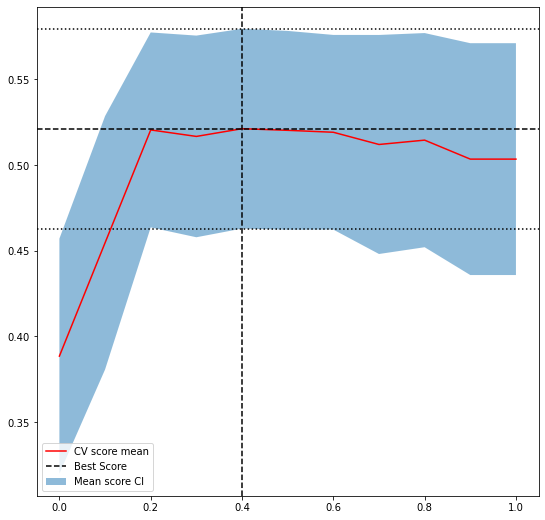

In [16]:
fig, ax = plt.subplots(figsize=(9,9))
ax.plot(support, cvmean, '-r', label='CV score mean')
ax.fill_between(support, lower, upper, alpha=0.5, label = 'Mean score CI')
ax.axhline(y=np.max(cvmean), ls='--', c='k', label='Best Score')
ax.axhline(y=upper[np.argmax(cvmean)], ls=':', c='k')
ax.axhline(y=lower[np.argmax(cvmean)], ls=':', c='k')
ax.axvline(x=support[np.argmax(cvmean)], ls='--', c='k')
plt.legend()
plt.show()
plt.close()

**How can you make the blue band smaller?**  
Have more CV splits (*e.g.* increase `n_folds` or `n_repeats` in your `RepeatedKFold` object)

**Tip: Pickle your Cross Validations**

In [17]:
import pickle

rkf = RepeatedKFold(n_splits=3,n_repeats=200, random_state=11)
params = {'ccp_alpha':np.linspace(0,1,101)}

cvreg_small2 = GridSearchCV(DecisionTreeRegressor(random_state=123), params, cv=rkf, n_jobs=-1, verbose=1)
cvreg_small2.fit(X_train, y_train)

with open('large_repeat_cv.pickle', 'wb') as f:
    pickle.dump(cvreg_small2, f)

Fitting 600 folds for each of 101 candidates, totalling 60600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 24312 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 38712 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 56312 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 60600 out of 60600 | elapsed:  2.0min finished


{'ccp_alpha': 0.36}
Cross Validation Score:  0.543305942741142
Validation Set Score:    0.5232640407686532


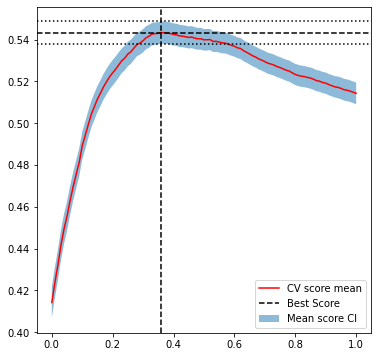

In [18]:
with open('large_repeat_cv.pickle', 'rb') as f:
    pickled_cv = pickle.load(f)
    
cv_results = pd.DataFrame(pickled_cv.cv_results_)

print(pickled_cv.best_params_)
print('Cross Validation Score: ', pickled_cv.best_score_)
print('Validation Set Score:   ', pickled_cv.score(X_test, y_test))

cvmean = cv_results.mean_test_score
cvstd = cv_results.std_test_score
upper = cvmean+2*cvstd/np.sqrt(pickled_cv.n_splits_)
lower = cvmean-2*cvstd/np.sqrt(pickled_cv.n_splits_)
support = cv_results.param_ccp_alpha.to_list()

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(support, cvmean, '-r', label='CV score mean')
ax.fill_between(support, lower, upper, alpha=0.5, label = 'Mean score CI')
ax.axhline(y=np.max(cvmean), ls='--', c='k', label='Best Score')
ax.axhline(y=upper[np.argmax(cvmean)], ls=':', c='k')
ax.axhline(y=lower[np.argmax(cvmean)], ls=':', c='k')
ax.axvline(x=support[np.argmax(cvmean)], ls='--', c='k')
plt.legend()
plt.show()
plt.close()

Note: Confidence Interval of the mean $\neq$ Prediction Interval.

In [19]:
qq = np.quantile(cv_results.iloc[36, 6:606].to_numpy(), (.025, .975))
print('95%s of the CV scores fell between %.3f and %.3f.' % ('%', qq[0], qq[1]))

95% of the CV scores fell between 0.400 and 0.651.


### Visualizing more than one parameter at once

Parameters have interaction effects. You can't optimize one at a time.

I like using Matplotlib directly, but Seaborn makes plotting possible with much neater code.

In [20]:
import seaborn as sns

cv_results_large = pd.DataFrame(cvreg_large.cv_results_)
cv_results_large[['param_ccp_alpha', 
                  'param_max_features', 
                  'param_min_samples_split', 
                  'mean_test_score', 
                  'std_test_score']].head()

,param_ccp_alpha,param_max_features,param_min_samples_split,mean_test_score,std_test_score
0,0,1,2,-0.243912,0.308324
1,0,1,3,-0.395332,0.145436
2,0,1,4,-0.412487,0.144158
3,0,1,5,-0.266877,0.251680
4,0,1,6,-0.198871,0.167947


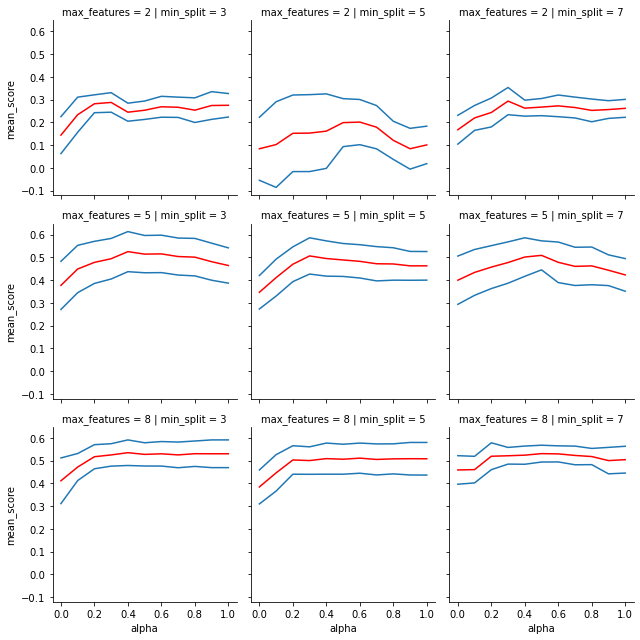

In [21]:
cv_results_large['upper'] = cv_results_large.mean_test_score + \
                            2 * cv_results_large.std_test_score/np.sqrt(cvreg_small.n_splits_)
cv_results_large['lower'] = cv_results_large.mean_test_score - \
                            2 * cv_results_large.std_test_score/np.sqrt(cvreg_small.n_splits_)
# subset columns to make it smaller
relevant = ['param_ccp_alpha', 
            'param_max_features', 
            'param_min_samples_split', 
            'mean_test_score', 
            'upper',
            'lower']
df = cv_results_large[relevant]
# rename for plotting
df.columns = ['alpha', 'max_features', 'min_split', 'mean_score', 'upper', 'lower']
# quering to make smaller panel on presentation
grid = sns.FacetGrid(df.query('max_features in [2,5,8] and min_split in [3,5,7]'), 
                     col='min_split',
                     row='max_features',
                     height=3)
grid.map(plt.plot, 'alpha', 'lower')
grid.map(plt.plot, 'alpha', 'upper')
grid.map(plt.plot, 'alpha', 'mean_score', color='red')
grid.fig.tight_layout()
plt.show()
plt.close()

## Building a Pipeline

* Data is never model ready in real life
* Non-linear relations
* Remove irrelevant variables

**Building a Pipeline guarantees no contamination between training and testing data**

**Preprocessing steps can be combined with model for Cross Validation**

**[sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)** for Pipeline

**[sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** for feature selection algorithms

### Motivation: polynomial regression with variable selection

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.pipeline import Pipeline

# linear fit
reg = LinearRegression()
reg.fit(X_train, y_train)
print('Train fit score:', reg.score(X_train, y_train))
print('Test fit score: ', reg.score(X_test, y_test))

Train fit score: 0.691175132544481
Test fit score:  0.6853405569074937


In [23]:
# create variables for quadratic fit
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# quadratic fit
reg.fit(X_train_poly, y_train)
print('Train polynomial fit score:', reg.score(X_train_poly, y_train))
print('Test polynomial fit score: ', reg.score(X_test_poly, y_test))

Train polynomial fit score: 0.8456260466269108
Test polynomial fit score:  0.7371774725158532


In [24]:
# create variables for quadratic fit
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

# reduce the number of variables to 40 "best"
reducer = SelectKBest(mutual_info_regression, k=40)
X_train_reduced = reducer.fit_transform(X_train_poly, y_train)
X_test_reduced = reducer.transform(X_test_poly)
print(X_train_reduced.shape)

# fit with reduced features
reg.fit(X_train_reduced, y_train)
print('Train reduced polynomial fit score:', reg.score(X_train_reduced, y_train))
print('Test reduced polynomial fit score: ', reg.score(X_test_reduced, y_test))

(375, 66)
(375, 40)
Train reduced polynomial fit score: 0.8303511653834044
Test reduced polynomial fit score:  0.7584281139630955


### Pipeline structure

```
Pipeline([
    ('Name_of_step', Transformer),
    ('Name_of_step', Transformer),
    ...
    ('Name_of_step', Transformer),
    ('Name_of_step', Estimator or Transformer),
])
```

#### fit
* Data in...
* Step 1: `fit_transform`
* Step 2: `fit_transform`
* ...
* Step n-1: `fit_transform`
* Step n: `fit`

#### predict
* Data in...
* Step 1: `transform`
* Step 2: `transform`
* ...
* Step n-1: `transform`
* Step n: `predict`

You can use a pipeline only to transform.  
You can use a pipeline inside a pipeline.  
You can use a pipeline in GridSearchCV.

In [25]:
from sklearn.feature_selection import RFECV

pipe = Pipeline([
    ('poly',PolynomialFeatures(2)), 
    ('reduce',RFECV(LinearRegression(), cv=3)), # not SelectKBest(mutual_info_regression, k=40) ?
    ('regressor',LinearRegression())
])

pipe.fit(X_train, y_train)
print('Pipeline train score:', pipe.score(X_train, y_train))
print('Pipeline test score: ', pipe.score(X_test, y_test))

Pipeline train score: 0.81602279708438
Pipeline test score:  0.7978056653229169


In [26]:
params = {'poly__degree' : (1, 2, 3)}
cvpipe = GridSearchCV(pipe, params, n_jobs=-2, cv=kf, verbose=1)
cvpipe.fit(X_train, y_train)
print('Best Parameters')
print(cvpipe.best_params_)
print('Cross validation score: ', cvpipe.best_score_)
print('Validation set score:   ', cvpipe.score(X_test, y_test))

Fitting 6 folds for each of 3 candidates, totalling 18 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 out of  18 | elapsed:   20.4s finished


Best Parameters
{'poly__degree': 3}
Cross validation score:  0.7675674912383325
Validation set score:    0.8322680962320792


In [27]:
cvpipe.best_estimator_.steps[1][1].n_features_

18

### Providing parameters that are not independent

**Example: different number of features to select depending on polynomial degree.**

**Instead of passing a dictionary of parameters, use a list of disctionaries.**

In [28]:
# Depending on the degree for PolynomialFeatures 
# we have different number of features to select

for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    print('Degree %d has %d features' % (i, X_train_poly.shape[1]))

Degree 1 has 11 features
Degree 2 has 66 features
Degree 3 has 286 features
Degree 4 has 1001 features


In [29]:
pipe = Pipeline([
    ('poly',PolynomialFeatures()), 
    ('reduce', SelectKBest(mutual_info_regression)),
    ('regressor',LinearRegression())
])

params = [{'poly__degree' : [1], 'reduce__k':[*range(6,12)]},
          {'poly__degree' : [2, 3], 'reduce__k':[*range(40,50)]}]

cvpipe = GridSearchCV(pipe, params, n_jobs=-2, cv=kf, verbose=1)
cvpipe.fit(X_train, y_train)
print('Best Parameters')
print(cvpipe.best_params_)
print('Cross validation score: ', cvpipe.best_score_)
print('Validation set score:   ', cvpipe.score(X_test, y_test))

Fitting 6 folds for each of 26 candidates, totalling 156 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-2)]: Done 156 out of 156 | elapsed:   48.6s finished


Best Parameters
{'poly__degree': 2, 'reduce__k': 48}
Cross validation score:  0.7234515544727743
Validation set score:    0.7502002492467709


### Displaying the Pipeline as a diagram

In [30]:
from sklearn import set_config
set_config(display='diagram')
cvpipe

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=11),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('reduce',
                                        SelectKBest(score_func=<function mutual_info_regression at 0x7f725c65e200>)),
                                       ('regressor', LinearRegression())]),
             n_jobs=-2,
             param_grid=[{'poly__degree': [1],
                          'reduce__k': [6, 7, 8, 9, 10, 11]},
                         {'poly__degree': [2, 3],
                          'reduce__k': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                        49]}],
             verbose=1)

### Using Pipeline to let GridSearchCV choose a transformer for you

Use `'passtrough'` as transformer or estimator.  
Pass transformer or estimator with the list of parameters.

Example:

In [31]:
# What if you want to use GridSearchCV to choose
# the variable selection criteria for you?
# Yes! It is possible! And the Regressor as well!

from sklearn.feature_selection import RFE

pipe = Pipeline([
    ('poly',PolynomialFeatures()), 
    ('reduce', 'passthrough'), # reducer will be part of the parameters
    ('regressor','passthrough')
])

params = [
    {
        'poly__degree' : [2, 3],
        'reduce': [SelectKBest(mutual_info_regression)],
        'reduce__k': [30,40,50],
        'regressor': [LinearRegression()],
    },
    {
        'poly__degree' : [2, 3],
        'reduce': [SelectKBest(mutual_info_regression)],
        'reduce__k': [30,40,50],
        'regressor': [DecisionTreeRegressor()],
        'regressor__ccp_alpha': np.linspace(0,1,3),
    },
    {
        'poly__degree' : [2, 3],
        'reduce': [RFE(LinearRegression())],
        'reduce__n_features_to_select': [15,20,25],
        'regressor': [LinearRegression()],
    },
    {
        'poly__degree' : [2,3],
        'reduce': [RFE(DecisionTreeRegressor())],
        'reduce__n_features_to_select': [15,20,25],
        'regressor': [DecisionTreeRegressor()],
        'regressor__ccp_alpha': np.linspace(0,1,3),
    },
]

cvpipe = GridSearchCV(pipe, params, n_jobs=-2, cv=3, verbose=1, scoring='r2')
cvpipe.fit(X_train, y_train)
print('Best Parameters')
print(cvpipe.best_params_)
print('Cross validation score: ', cvpipe.best_score_)
print('Validation set score:   ', cvpipe.score(X_test, y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-2)]: Done 144 out of 144 | elapsed:  2.1min finished


Best Parameters
{'poly__degree': 3, 'reduce': RFE(estimator=LinearRegression(), n_features_to_select=15), 'reduce__n_features_to_select': 15, 'regressor': LinearRegression()}
Cross validation score:  0.7825996028849763
Validation set score:    0.8400283826757045


## Using FunctionTransformer and ColumnTransformer

`FunctionTransformer` turns a function into a transformer with with methods `fit` and `transform` to be used in a Pipeline.

`ColumnTransformer` allows you to apply a different transformer for each list of columns:
 ```
 ColumnTransformer([
     ('Name',Transformer,[list_of_columns]),
     ('Name',Transformer,[more_columns]),
 ])
```
Real data is a lot more complicated.
* Missing values
* Mix of continuous and categorical features
* Potential different scaling for different features

Titanic Passengers Data (from Kaggle.com)

In [32]:
df_train = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')

print(df_train.shape)
print(df_test.shape)
print('Test data has target missing for competition evaluation.')

print(df_train.head())
print(df_train.info())
print(df_train.nunique())

y = df_train.pop('Survived').astype('category').squeeze()

(891, 11)
(418, 10)
Test data has target missing for competition evaluation.
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                 

`Pclass` is the passenger class. Should be categorical  
`Name` is useless as is, but every name has a title ("Mr.", "Mrs.", "Master", "Dr.", etc.)  
`Sex` is ok  
`Age` has missing values  
`SibSp` is the number of sibblings and spouses in the ship  
`Parch` is the number of parents and children in the ship  
`Ticket` has too many levels to be usefull  
`Fare` is the value paid for the ticket  
`Cabin` on it's own has too many levels (and missing values), some passengers have more than one cabin, but the first letter is the Deck  
`Embarked` has 3 levels, one for each city where the passenger embarked  

**How would you imput missing values for Age?**

In [33]:
title_map = {
    'Capt'    :'Other',
    'Col'     :'Other',
    'Countess':'Other',
    'Don'     :'Other',
    'Dona'    :'Other',
    'Dr'      :'Other',
    'Jonkheer':'Other',
    'Lady'    :'Other',
    'Major'   :'Other',
    'Master'  :'Master',
    'Miss'    :'Miss',
    'Mlle'    :'Miss',
    'Mme'     :'Mrs',
    'Mr'      :'Mr',
    'Mrs'     :'Mrs',
    'Ms'      :'Miss',
    'Rev'     :'Other',
    'Sir'     :'Other',
}

# Estract title from Name and map to the grouped titles (title_map)
df_train['Title'] = df_train.Name.str.extract(r'[\s]([\w]+)[.]').squeeze().map(title_map)
# Decks
df_train['Deck'] = df_train.Cabin.str.extract(r'([A-Z])')
df_train.loc[df_train.Deck.isna(),'Deck'] = 'U'
df_train.loc[df_train.Deck=='T','Deck'] = 'U' # There is only one known passenger on Deck 'T'
# Flagging missing ages
df_train['Age_missing'] = df_train.Age.isna()
df_train['Embarked']=df_train.Embarked.fillna(df_train.Embarked.mode()[0])

# Assign missing age to averages on training set by title group
def fillna_mean(df):
    return df.fillna(df.mean())
df_train['Age'] = df_train[['Age', 'Title']].groupby(['Title']).transform(fillna_mean)
# Why not use lambda function? Think Pickle!

# Fare per family member
df_train['Fare_pp'] = df_train.Fare / (df_train.Parch + df_train.SibSp + 1)

numeric_features = ['Age', 'Fare_pp', 'Parch', 'SibSp']
categorical_features = ['Pclass', 'Title', 'Deck', 'Sex', 'Age_missing', 'Embarked']

df_train[categorical_features] = df_train[categorical_features].astype('category')

X = df_train[numeric_features + categorical_features]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          891 non-null    float64 
 1   Fare_pp      891 non-null    float64 
 2   Parch        891 non-null    int64   
 3   SibSp        891 non-null    int64   
 4   Pclass       891 non-null    category
 5   Title        891 non-null    category
 6   Deck         891 non-null    category
 7   Sex          891 non-null    category
 8   Age_missing  891 non-null    category
 9   Embarked     891 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 41.0 KB
None


**Note: My missing `Age` computation here is contaminated.** As are the 2 missing `Embarked` values.

The average age for each `Title` subgroup. The age of the individuals assigned to the test data in CV are influencing the filling of missing values when we pretend we don't have it to evaluate the model.

Possible solution: create a custom class with methods `fit` to compute the mean age of each subgroup and `transform` to fill missing values accordingly.

**[sklearn.base](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.base)** for BaseEstimator and TransformerMixin

Is it worth it?

### Building the Pipeline:

* Want to Discretize `Age` to capture priority of children and elderly on life boats
* Apply Log on `Fare_pp` -> no preprocessing built in function for it
* Normalize numeric variables, including the log of `Fare_pp`
* create dummy encoding for categorizal variables
* Different preprocessing for each variable -> `ColumnTransformer`

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold

pipe = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('age_bins', KBinsDiscretizer(5), ['Age']),
        ('Fare_log', Pipeline([
                ('log', FunctionTransformer(np.log1p, validate=True)),
                ('scale', StandardScaler()),
            ]), ['Fare_pp']),
        ('Family_size', StandardScaler(), ['Parch', 'SibSp']),
        ('Categories', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ], 
        remainder='passthrough') 
    ),
    ('classifier', LinearDiscriminantAnalysis()),
])

skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=44)
P=20
params = {'preprocessor__age_bins__n_bins':[3,4,5,6],
          'classifier__priors':[(1-p/P, p/P) for p in range(1,P)]}

pipecv = GridSearchCV(pipe, params, cv=skf, n_jobs=-2, verbose=1, scoring='accuracy')
pipecv.fit(X, y)
print('Best Parameters')
print(pipecv.best_params_)
print('Cross validation score: ', pipecv.best_score_)

Fitting 6 folds for each of 76 candidates, totalling 456 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  65 tasks      | elapsed:    5.1s


Best Parameters
{'classifier__priors': (0.7, 0.3), 'preprocessor__age_bins__n_bins': 5}
Cross validation score:  0.8322109988776655


[Parallel(n_jobs=-2)]: Done 451 out of 456 | elapsed:   15.1s remaining:    0.2s
[Parallel(n_jobs=-2)]: Done 456 out of 456 | elapsed:   15.1s finished


In [35]:
pipecv

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=3, random_state=44),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age_bins',
                                                                         KBinsDiscretizer(),
                                                                         ['Age']),
                                                                        ('Fare_log',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                              validate=True)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Fare_pp'])...
                                                (0.85, 0.15), (0.8, 0.2),
                                                (0.75, 0.25), (0.7, 0.3),
                                                (0.65, 0.35), (0.6, 0.4),
                                                (0.55, 0.45), (0.5, 0.5),
                                                (0.44999999999999996, 0.55),
                                                (0.4, 0.6), (0.35, 0.65),
                                                (0.30000000000000004, 0.7),
                                                (0.25, 0.75),
                                                (0.19999999999999996, 0.8),
                                                (0.15000000000000002, 0.85),
                                                (0.09999999999999998, 0.9),
                                                (0.050000000000000044, 0.95)],
                         'preprocessor__age_bins__n_bins': [3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [36]:
pipecv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_bins',
                                                  KBinsDiscretizer(), ['Age']),
                                                 ('Fare_log',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Fare_pp']),
                                                 ('Family_size',
                                                  StandardScaler(),
                                                  ['Parch', 'SibSp']),
                                                 ('Categories',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Title', 'Deck',
                                                   'Sex', 'Age_missing',
                                                   'Embarked'])])),
                ('classifier', LinearDiscriminantAnalysis(priors=(0.7, 0.3)))])

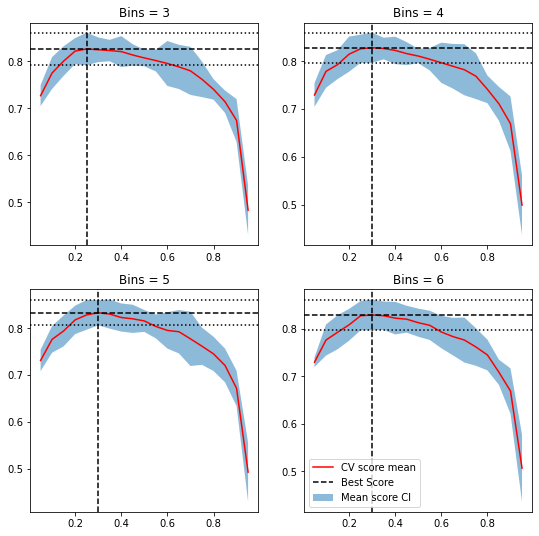

In [37]:
df_cv = pd.DataFrame(pipecv.cv_results_)

fig, axss = plt.subplots(2,2, figsize=(9,9))
axs = axss.ravel()

for ax, degree in zip(axs, [3,4,5,6]):
    df_plot = df_cv[df_cv.param_preprocessor__age_bins__n_bins == degree]
    cvmean = df_plot.mean_test_score.to_numpy()
    upper = cvmean + 2 * df_plot.std_test_score.to_numpy()
    lower = cvmean - 2 * df_plot.std_test_score.to_numpy()
    support = [p[1] for p in df_plot.param_classifier__priors.to_numpy()]
    ax.plot(support, cvmean, '-r', label='CV score mean')
    ax.fill_between(support, lower, upper, alpha=0.5, label = 'Mean score CI')
    ax.axhline(y=np.max(cvmean), ls='--', c='k', label='Best Score')
    ax.axhline(y=upper[np.argmax(cvmean)], ls=':', c='k')
    ax.axhline(y=lower[np.argmax(cvmean)], ls=':', c='k')
    ax.axvline(x=support[np.argmax(cvmean)], ls='--', c='k')
    ax.set_title('Bins = %d' % degree)

plt.legend()
plt.show()
plt.close()

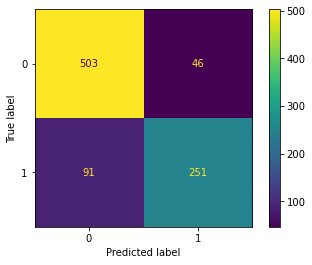

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipecv, X, y)
plt.show()
plt.close()

### Solving the missing age computation contamination

All previous manipulation except for missing age value computations

In [39]:
df_train = pd.read_csv('train.csv', index_col='PassengerId')

y = df_train.pop('Survived').astype('category').squeeze()

# Estract title from Name and map to the grouped titles (title_map)
df_train['Title'] = df_train.Name.str.extract(r'[\s]([\w]+)[.]').squeeze().map(title_map)
# Decks
df_train['Deck'] = df_train.Cabin.str.extract(r'([A-Z])')
df_train.loc[df_train.Deck.isna(),'Deck'] = 'U'
df_train.loc[df_train.Deck=='T','Deck'] = 'U' # There is only one known passenger on Deck 'T'
# Flagging missing ages
df_train['Age_missing'] = df_train.Age.isna()
df_train['Embarked']=df_train.Embarked.fillna(df_train.Embarked.mode()[0])
# Fare per family member
df_train['Fare_pp'] = df_train.Fare / (df_train.Parch + df_train.SibSp + 1)

numeric_features = ['Age', 'Fare_pp', 'Parch', 'SibSp']
categorical_features = ['Pclass', 'Title', 'Deck', 'Sex', 'Age_missing', 'Embarked']

df_train[categorical_features] = df_train[categorical_features].astype('category')

X = df_train[numeric_features + categorical_features]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          714 non-null    float64 
 1   Fare_pp      891 non-null    float64 
 2   Parch        891 non-null    int64   
 3   SibSp        891 non-null    int64   
 4   Pclass       891 non-null    category
 5   Title        891 non-null    category
 6   Deck         891 non-null    category
 7   Sex          891 non-null    category
 8   Age_missing  891 non-null    category
 9   Embarked     891 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 41.0 KB
None


In [40]:
X.Age.isna().sum()

177

In [41]:
X[['Age', 'Title']].groupby(['Title']).mean()

,Age
Title,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Other,45.545455


#### Creating the missing age imputer class

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class TitanicMissingAgeImputer(TransformerMixin, BaseEstimator):
    '''Imputes missing values of Age using the mean age per Title group'''
    
    def fit(self, _X_, _y_=None):
        self.ages_by_group_ = _X_[['Age', 'Title']].groupby(['Title']).mean()
        return self
    
    def transform(self, _X_):
        out = _X_.copy()
        for title, age in self.ages_by_group_.itertuples():
            out.loc[(_X_.Title==title) & _X_.Age.isna(),'Age'] = age
        # If title not in fitted, fill with overall mean
        out.loc[:,'Age'].fillna(_X_.Age.mean(), inplace=True)
        return out

In [43]:
na_age_imputer = TitanicMissingAgeImputer()
na_age_imputer.fit(X)
print(na_age_imputer.ages_by_group_)

              Age
Title            
Master   4.574167
Miss    21.845638
Mr      32.368090
Mrs     35.788991
Other   45.545455


In [44]:
X_fixed = na_age_imputer.transform(X)
X_fixed.Age.isna().sum()

0

#### Re-writing the Pipeline to include the missing age imputer

In [45]:
pipe = Pipeline([
    ('na_age_handler', TitanicMissingAgeImputer()),
    ('preprocessor', ColumnTransformer([
        ('age_bins', KBinsDiscretizer(5), ['Age']),
        ('Fare_log', Pipeline([
                ('log', FunctionTransformer(np.log1p, validate=True)),
                ('scale', StandardScaler()),
            ]), ['Fare_pp']),
        ('Family_size', StandardScaler(), ['Parch', 'SibSp']),
        ('Categories', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ], 
        remainder='passthrough') 
    ),
    ('classifier', LinearDiscriminantAnalysis()),
])

skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=44)
P=20
params = {'preprocessor__age_bins__n_bins':[3,4,5,6],
          'classifier__priors':[(1-p/P, p/P) for p in range(1,P)]}

pipecv = GridSearchCV(pipe, params, cv=skf, n_jobs=-2, verbose=1, scoring='accuracy')
pipecv.fit(X, y)
print('Best Parameters')
print(pipecv.best_params_)
print('Cross validation score: ', pipecv.best_score_)

Fitting 6 folds for each of 76 candidates, totalling 456 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-2)]: Done 382 tasks      | elapsed:   15.7s


Best Parameters
{'classifier__priors': (0.7, 0.3), 'preprocessor__age_bins__n_bins': 5}
Cross validation score:  0.8310886644219977


[Parallel(n_jobs=-2)]: Done 456 out of 456 | elapsed:   18.6s finished


# Additional References

[An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](https://faculty.marshall.usc.edu/gareth-james/ISL/)